# Phase 1 - Normal Task

# EDA - Terrorism


## Problem Statement :-

### The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover trends, identify high-risk regions, understand attack characteristics, and potentially reveal factors that contribute to terrorist activities.

## Let's Start

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
data = pd.read_csv('C:/Users/Admin/Desktop/CVIP EDA PRoj/globalterrorismdb_0718dist.csv', encoding='latin1')


In [85]:
pd.set_option("display.max_columns",500)

In [86]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

## Cleaning the data

In [87]:
#Extracting Columns
columns = ['iyear','imonth','iday','country_txt','city','latitude','longitude',
          'location','attacktype1_txt','targtype1_txt','targetsubtype1_txt','target1',
          'gname','motive','weapontype1_txt','dbsource','region_txt','nkill','nwound',
          'natlty1_txt','weapondetail']

In [74]:
data_clean = pd.DataFrame(data = data, columns = columns)

In [75]:
data_clean.shape

(174415, 21)

In [76]:
data_clean.isnull().sum()

iyear                 174415
imonth                174415
iday                  174415
country_txt           174415
city                     417
latitude                4211
longitude               4212
location              120805
attacktype1_txt       174415
targtype1_txt         174415
targetsubtype1_txt    174415
target1                  618
gname                 174415
motive                125041
weapontype1_txt       174415
dbsource              174415
region_txt            174415
nkill                 174415
nwound                174415
natlty1_txt           174415
weapondetail          174415
dtype: int64

In [77]:
data_clean.head(5)

,iyear,imonth,iday,country_txt,city,latitude,longitude,location,attacktype1_txt,targtype1_txt,targetsubtype1_txt,target1,gname,motive,weapontype1_txt,dbsource,region_txt,nkill,nwound,natlty1_txt,weapondetail
0,NaN,NaN,NaN,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,NaN,NaN,Julio Guzman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Mexico city,19.371887,-99.086624,NaN,NaN,NaN,NaN,"Nadine Chaval, daughter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Unknown,15.478598,120.599741,NaN,NaN,NaN,NaN,Employee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Athens,37.997490,23.762728,NaN,NaN,NaN,NaN,U.S. Embassy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Fukouka,33.580412,130.396361,NaN,NaN,NaN,NaN,U.S. Consulate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data_clean.rename(columns = {'iyear':'year',
                            'imonth':'month',
                            'iday':'day',
                            'country_txt':'country',
                            'attacktype1_txt':'attacktype',
                            'targtype1_txt':'targetype',
                            'targetsubtype2':'targetsubtype',
                            'gname':'group name',
                            'weapontype1_txt':'weapontype',
                            'dbsource':'source',
                            'region_txt':'region',
                            'nkill':'killed',
                            'nwound':'wounded',
                            'weapondetail':'weapons_detail',
                            'natlty1_txt':'nationality'}, inplace = True)

In [79]:
pd.set_option("display.max_columns", 500)

In [80]:
data_clean.head(5)

,year,month,day,country,city,latitude,longitude,location,attacktype,targetype,targetsubtype1_txt,target1,group name,motive,weapontype,source,region,killed,wounded,nationality,weapons_detail
0,NaN,NaN,NaN,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,NaN,NaN,Julio Guzman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Mexico city,19.371887,-99.086624,NaN,NaN,NaN,NaN,"Nadine Chaval, daughter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Unknown,15.478598,120.599741,NaN,NaN,NaN,NaN,Employee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Athens,37.997490,23.762728,NaN,NaN,NaN,NaN,U.S. Embassy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Fukouka,33.580412,130.396361,NaN,NaN,NaN,NaN,U.S. Consulate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Number of Kills from year 1970 - 2017


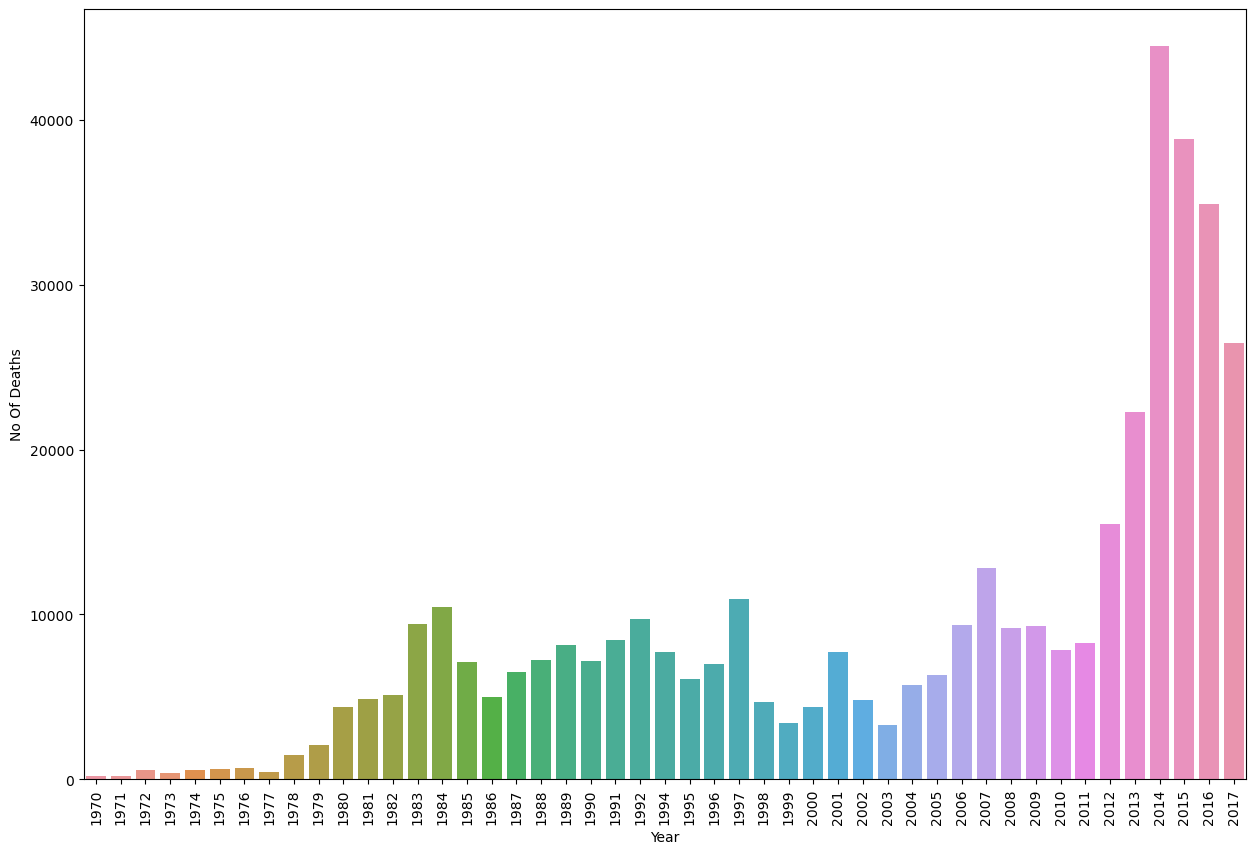

In [18]:
data['nkill'].fillna(0)
no_of_kills = data.groupby('iyear')['nkill'].sum()
plt.subplots(figsize=(15,10))
plot1 = sns.barplot(x=no_of_kills.index, y=no_of_kills)
plot1.set_xlabel("Year")
plot1.set_ylabel("No Of Deaths")
plot1.set_xticklabels(no_of_kills.index,rotation=90)
plt.show()

#### This Bar graph shows the number of deaths occurred due to terrorist activities. We can see that there has been a gradual rise in terrorist attacks since 2012 where the number of deaths were over 15000 and these terrorist attacks were at peak during the year 2014 where the total amount of deaths are over 40000. 

In [23]:
from ipywidgets import interact, interact_manual

In [88]:
@interact
def attack_year(year = list(data['iyear'].unique())):
    a = data[data['iyear'] == year]
    return sns.countplot(y = a['region_txt'], palette = 'viridis')

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

#### We built an interactive function where we can check which regions were affected the most during a particular year. From the above data we can see that Middle East and North Africa are the most affected regions during the year 2014 where the terrorism was at peak

## Nations that suffered more loss due to terrorism

In [35]:
nationality_top = data_clean[data_clean['nationality'] != 'Unknown']

In [36]:
nationality_type = nationality_top['nationality'].value_counts().reset_index()

In [48]:
nationality_type.rename(columns = {"index":'Num', "nationality":'Nationality', "count":'Counts'}, inplace = True)
nationality_type

,Nationality,Counts
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [46]:
data_clean['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

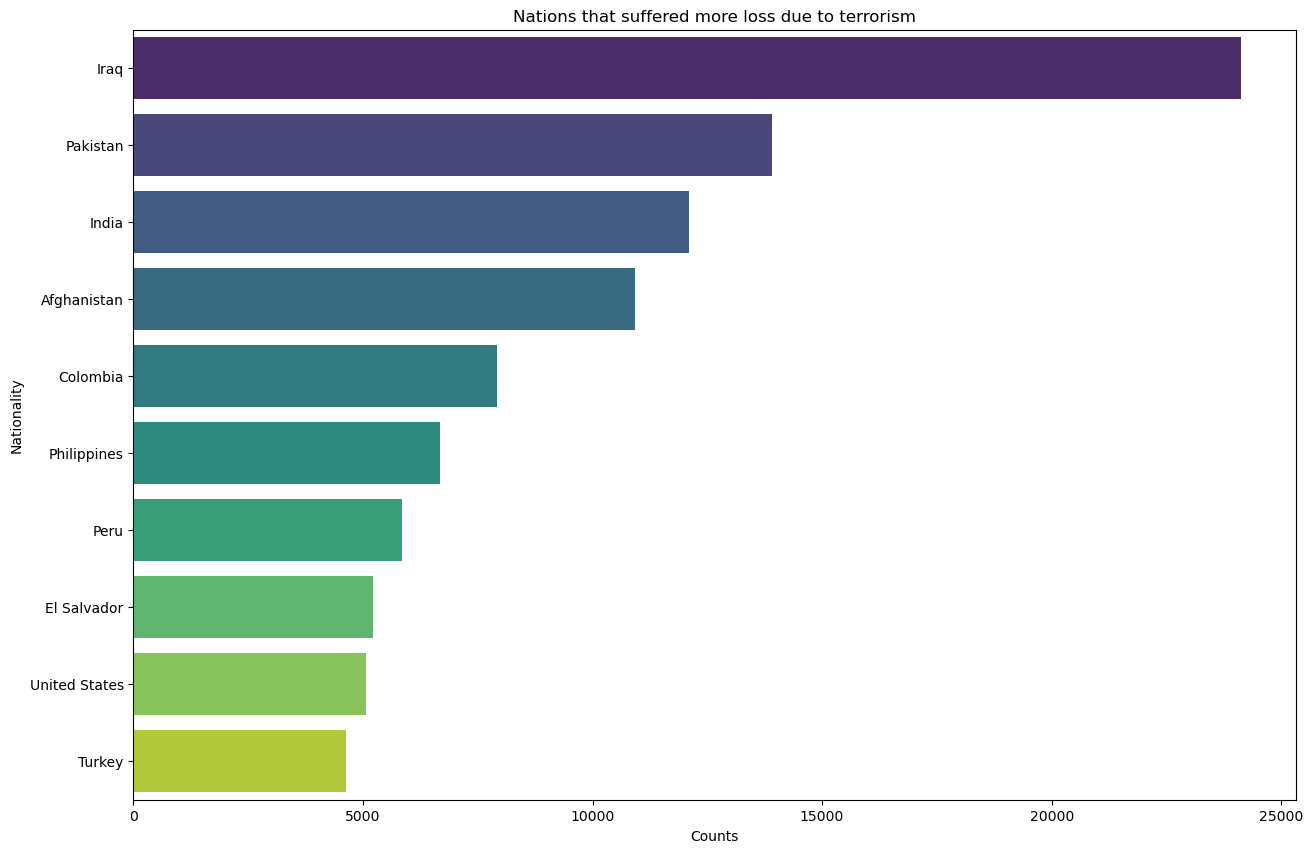

In [50]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Nationality", data=nationality_type[:10],
                 palette="viridis").set_title('Nations that suffered more loss due to terrorism')

#### From the above data we can see that Iraq suffered more loss and casualities due to terrorism

In [51]:
@interact
def country_name(region = list(data_clean['region'].unique())):
    a = data[(data_clean['region'] == region)]
    a = pd.DataFrame(a['country_txt'].value_counts())
    return a.style.background_gradient(cmap = 'plasma')

interactive(children=(Dropdown(description='region', options=('Central America & Caribbean', 'North America', …

## Highly active groups that cause terrorism

In [54]:
data = data_clean[data_clean['group name'] != 'Unknown']
data_group_org=data['group name'].value_counts().reset_index()
data_group_org.rename(columns={"index":'Num', "group name":'Group Name', "count":'Counts'},inplace=True)
data_group_org

,Group Name,Counts
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


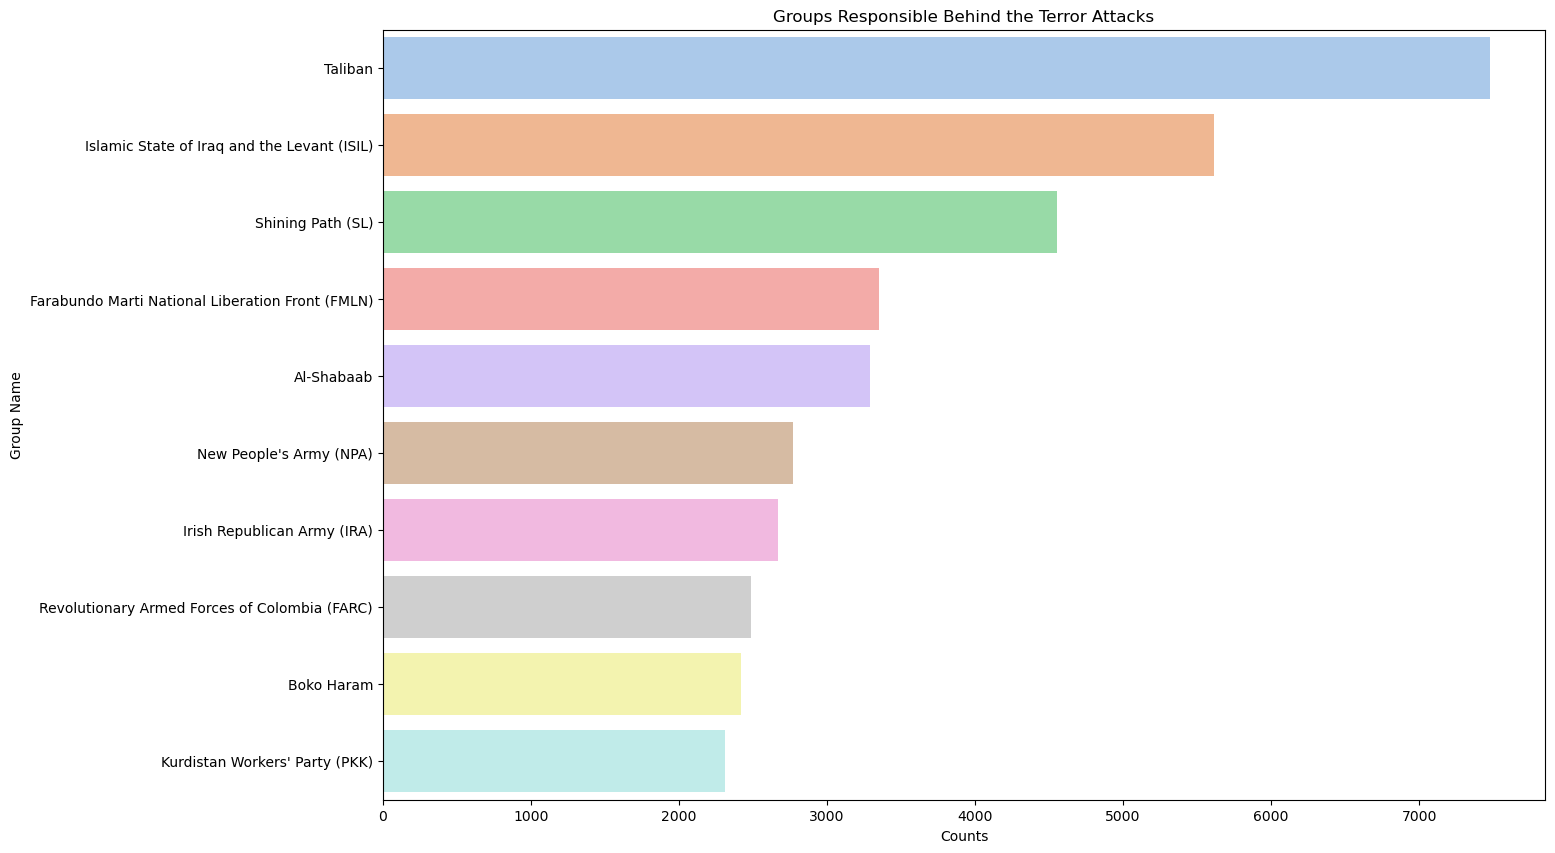

In [55]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Group Name", data=data_group_org[:10],
                 palette="pastel").set_title('Groups Responsible Behind the Terror Attacks')

#### From the above data we can see that Taliban is highly active group that causes terrorism around the world.

## High Risk Cities Around The World

In [56]:
data = data_clean[data_clean['city'] != 'Unknown']
data_city = data['city'].value_counts().reset_index()
data_city.rename(columns = {"index":'Num', "city":'City', "counts":'Counts'}, inplace = True)
data_city

,City,count
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36667,Hotwag,1
36668,Ostend,1
36669,Balughata,1
36670,Jikoyi,1


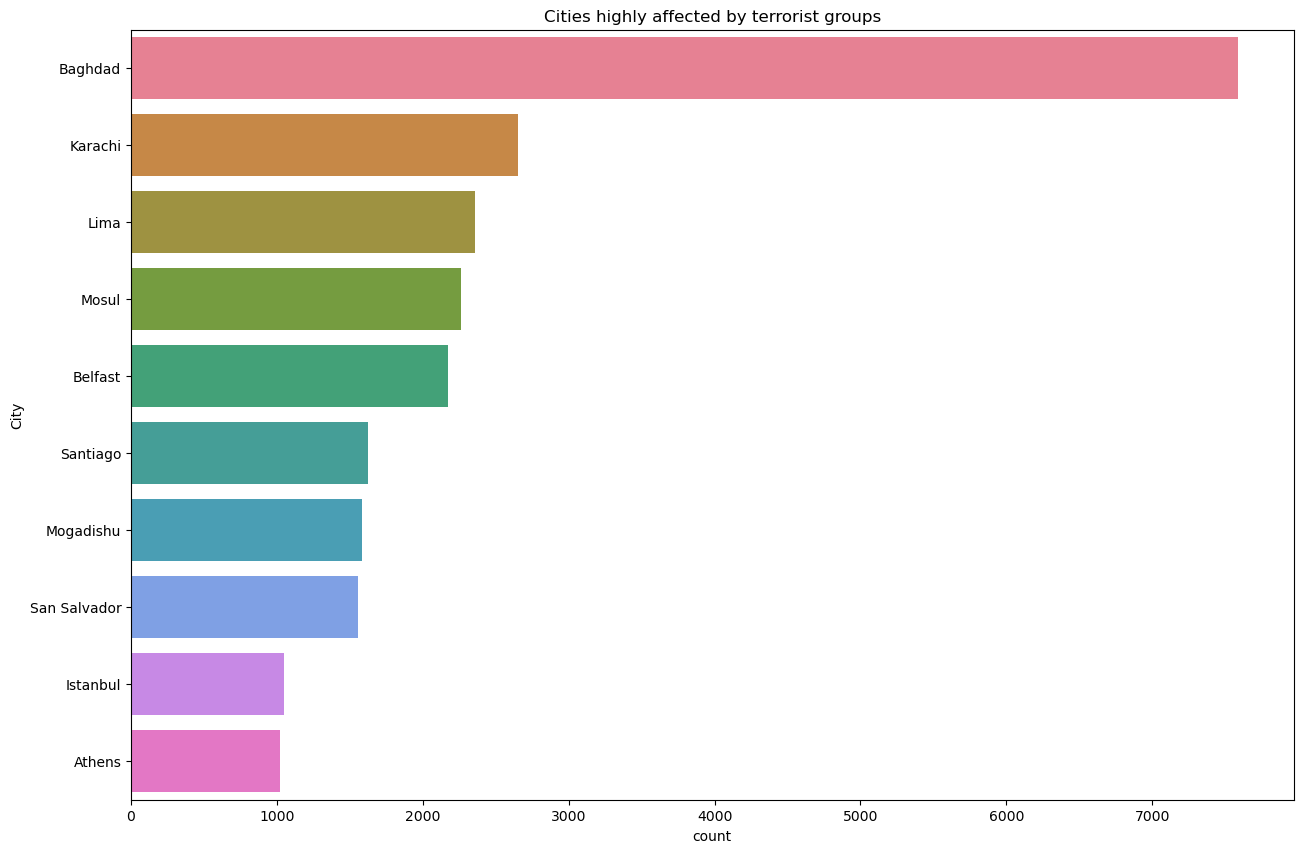

In [60]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="count", y="City", data=data_city[:10],
                 palette="husl").set_title('Cities highly affected by terrorist groups')

#### From the above data we can see that Baghdad is the highly affected city due to terrorism

## Attack Types by terrorists

In [66]:
data = data_clean[data_clean['attacktype'] != 'Unknown']
data_attack = data['attacktype'].value_counts().reset_index()
data_attack.rename(columns={"index":'Num',"attacktype":'Attacktype', "count":'Count'}, inplace=True)
data_attack

,Attacktype,Count
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unarmed Assault,1015
6,Hostage Taking (Barricade Incident),991
7,Hijacking,659


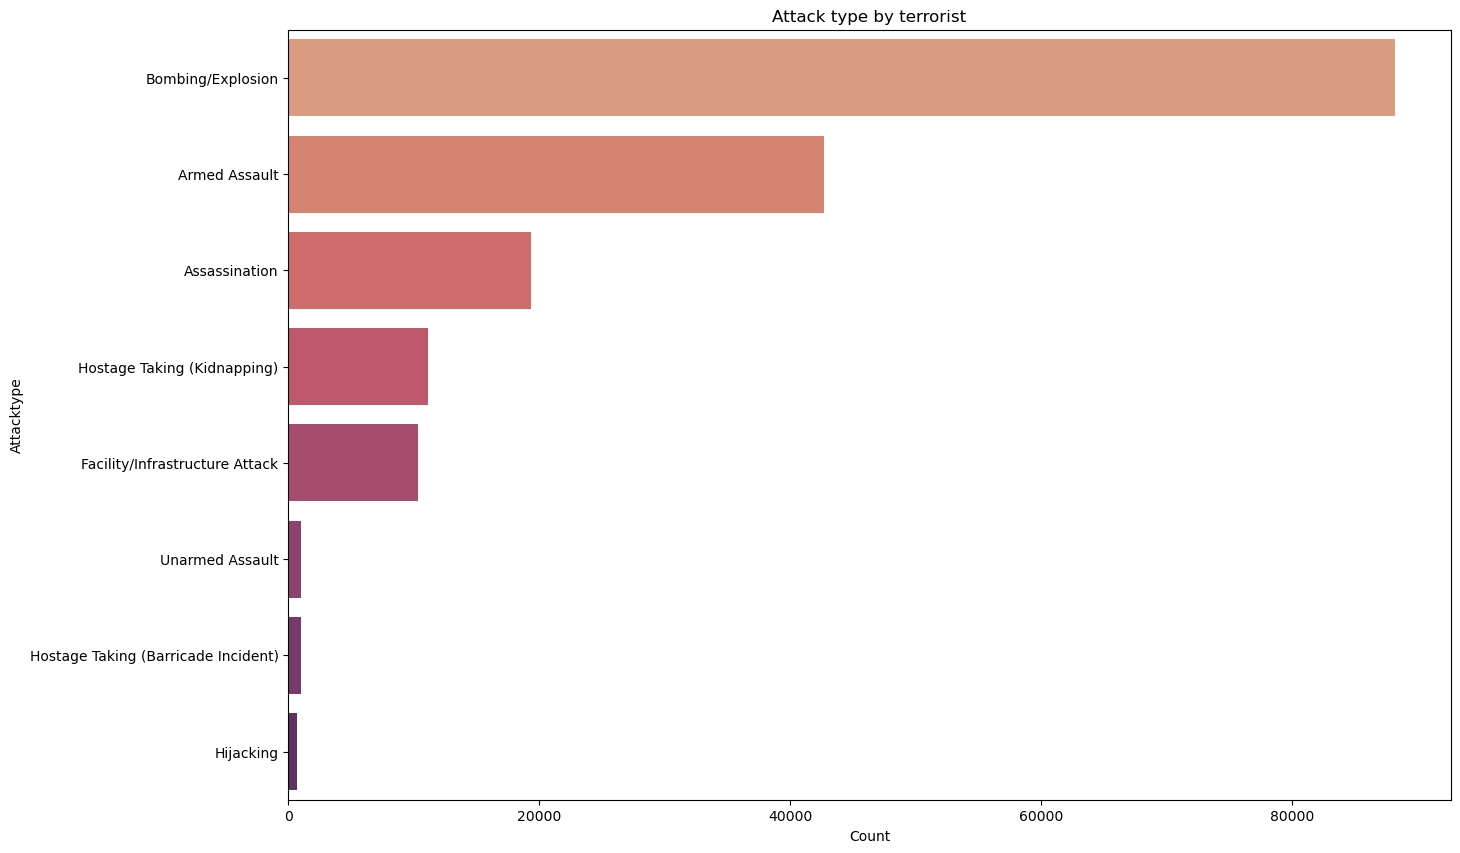

In [71]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Count", y="Attacktype", data=data_attack[:10],
                 palette="flare").set_title('Attack type by terrorist')

#### Terrorists tend to use Bombing/Explosion more to commit terrorism and create havoc

# From the above whole data visualization we are able to understand the trends, identify high-risk regions, understand attack characteristics, and potentially reveal factors that contribute to terrorist activities.

## We have seen that 2014 is the year when the terrorism was at it's peak. Iraq is the nation that suffered more loss due to terrorism. Taliban is the highly active group that is causing terrorism. Baghdad is the most highly active city where terrorism wreaks havoc. Terrorists mainly cause terrorism by Bombing/Explosions, Armed assaults, Assasinations etc....


## I sincerely thank CodersCave for giving me this oppurtunity to showcase my skills and complete this project.